# 52954 - Machine Learning and Statistics - Project

## Mark Kelly - 2019

This assessment concerns the Boston House Prices dataset and is broken up into 3 main sections:
- Describe
- Infer
- Predict

__Describe__: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset. This part is worth 20% of your overall mark.

__Infer__: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your ﬁndings within the notebook.

__Predict__: Again using the same notebook, use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

## Section 1 - Describe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.stats.weightstats as ws

In [2]:
from sklearn.datasets import load_boston
df_boston = load_boston()
import matplotlib.pyplot as plt

In [3]:
type(df_boston)

sklearn.utils.Bunch

In [4]:
print(df_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(data=df_boston['data'], columns=df_boston['feature_names'])

In [6]:
df['MEDV'] = df_boston.target

***

For this project, the inbuilt Boston dataset from sklearn is used. The dataset is loaded into a dataframe, df.
Using the describe fucntion with a transform to make reading easier, we can see that there are 506 values in each column of the dataset. Min, mean, max and other values are generated. 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


To get a better understand of what is going on with this dataset, a distribution plot has been generated for each column of data using the seaborn.distplot function. 

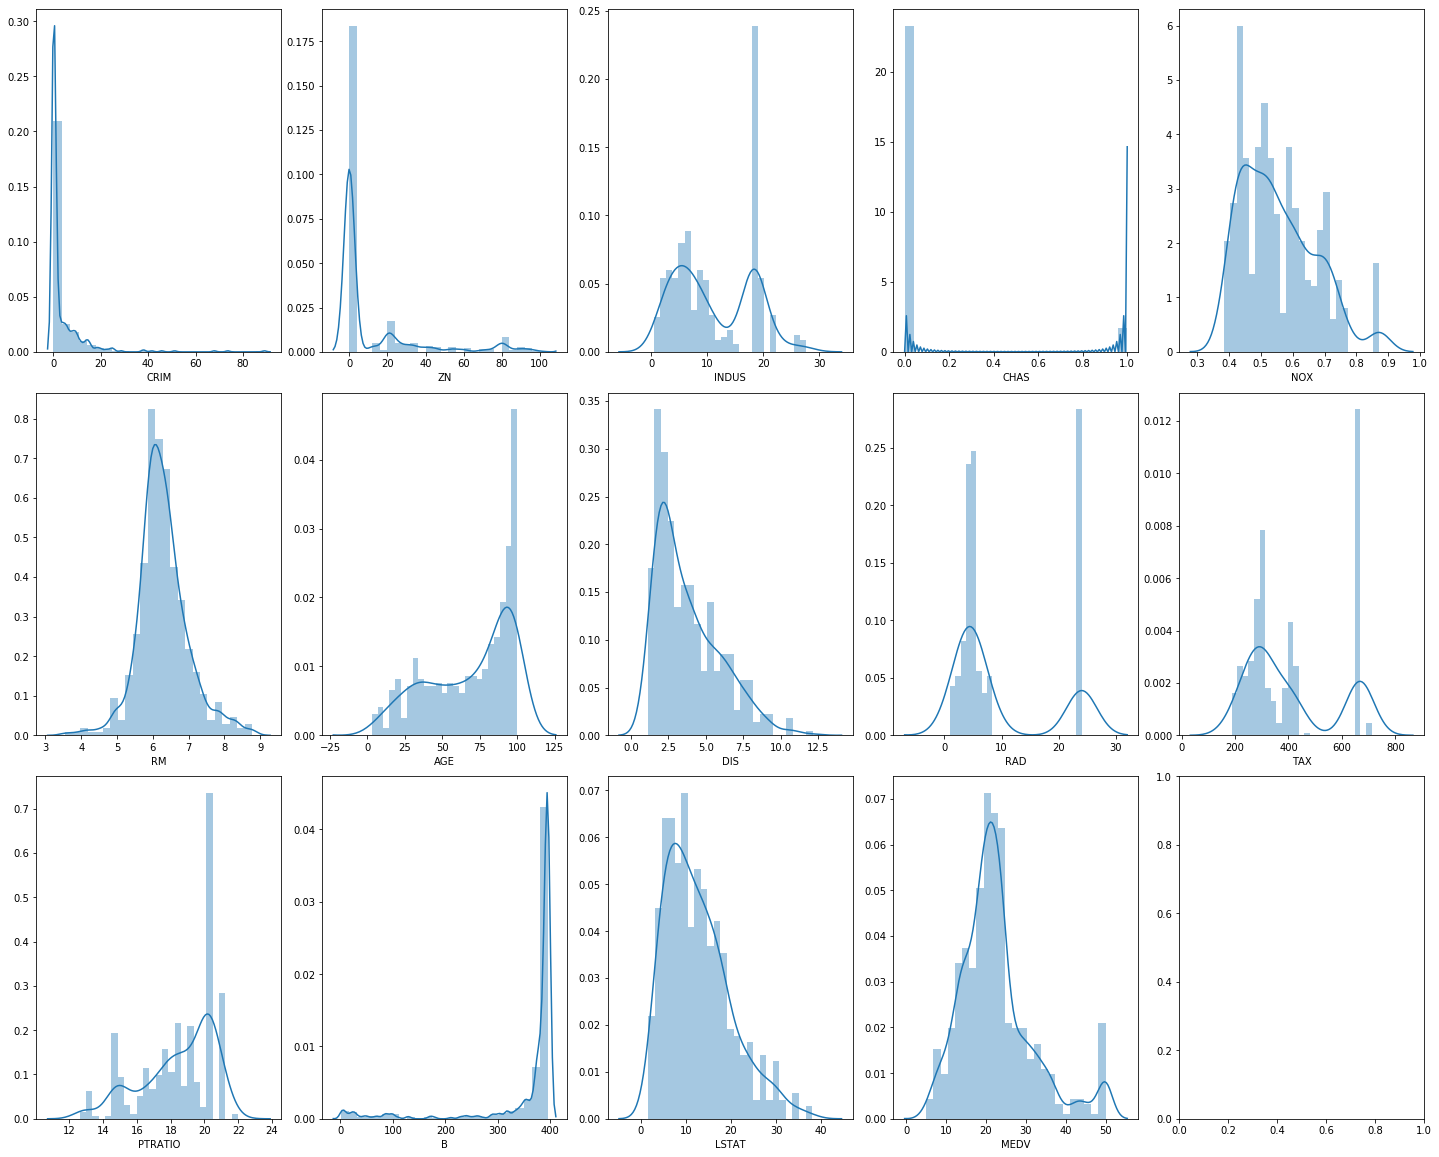

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.distplot(df['CRIM'], bins=25, ax=axs[0, 0])
sns.distplot(df['ZN'], bins=25, ax=axs[0, 1])
sns.distplot(df['INDUS'], bins=25, ax=axs[0, 2])
sns.distplot(df['CHAS'], bins=25, ax=axs[0, 3])
sns.distplot(df['NOX'], bins=25, ax=axs[0, 4])
sns.distplot(df['RM'], bins=25, ax=axs[1, 0])
sns.distplot(df['AGE'], bins=25, ax=axs[1, 1])
sns.distplot(df['DIS'], bins=25, ax=axs[1, 2])
sns.distplot(df['RAD'], bins=25, ax=axs[1, 3])
sns.distplot(df['TAX'], bins=25, ax=axs[1, 4])
sns.distplot(df['PTRATIO'], bins=25, ax=axs[2, 0])
sns.distplot(df['B'], bins=25, ax=axs[2, 1])
sns.distplot(df['LSTAT'], bins=25, ax=axs[2, 2])
sns.distplot(df['MEDV'], bins=25, ax=axs[2, 3])
plt.show()

From this we can see the distribution for each data column. We can see that the RM values are in a Gaussian Normal distribution. The values for CHAS are binomial with values of either 0 or 1. The distributions for DIS, LSTAT and NOX seem to follow the lognormal distribution.

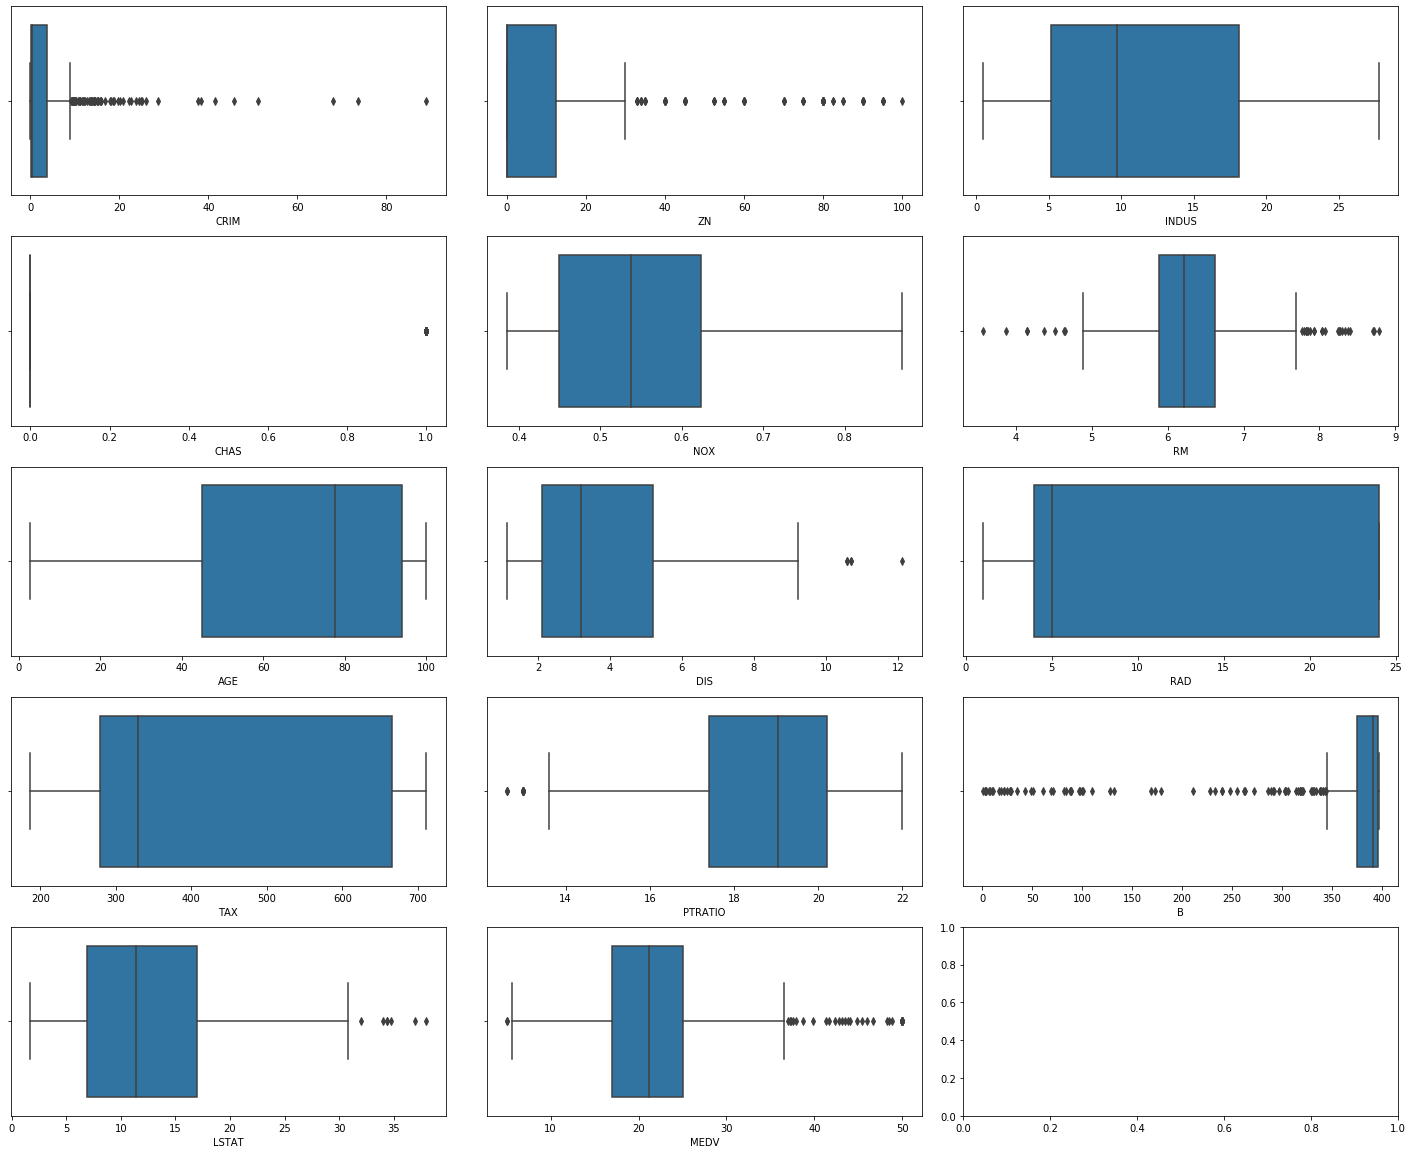

In [9]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.boxplot(x=df['CRIM'], ax=axs[0, 0])
sns.boxplot(x=df['ZN'], ax=axs[0, 1])
sns.boxplot(x=df['INDUS'], ax=axs[0, 2])
sns.boxplot(x=df['CHAS'], ax=axs[1, 0])
sns.boxplot(x=df['NOX'], ax=axs[1, 1])
sns.boxplot(x=df['RM'], ax=axs[1, 2])
sns.boxplot(x=df['AGE'], ax=axs[2, 0])
sns.boxplot(x=df['DIS'], ax=axs[2, 1])
sns.boxplot(x=df['RAD'], ax=axs[2, 2])
sns.boxplot(x=df['TAX'], ax=axs[3, 0])
sns.boxplot(x=df['PTRATIO'], ax=axs[3, 1])
sns.boxplot(x=df['B'], ax=axs[3, 2])
sns.boxplot(x=df['LSTAT'], ax=axs[4, 0])
sns.boxplot(x=df['MEDV'], ax=axs[4, 1])
plt.show()

In [10]:
df.cov().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,73.987,-40.216,23.992,-0.122,0.420,-1.325,85.405,-6.877,46.848,844.822,5.399,-302.382,27.986,-30.719
ZN,-40.216,543.937,-85.413,-0.253,-1.396,5.113,-373.902,32.629,-63.349,-1236.454,-19.777,373.721,-68.783,77.315
INDUS,23.992,-85.413,47.064,0.110,0.607,-1.888,124.514,-10.228,35.550,833.360,5.692,-223.580,29.580,-30.521
CHAS,-0.122,-0.253,0.110,0.065,0.003,0.016,0.619,-0.053,-0.016,-1.523,-0.067,1.131,-0.098,0.409
NOX,0.420,-1.396,0.607,0.003,0.013,-0.025,2.386,-0.188,0.617,13.046,0.047,-4.021,0.489,-0.455
RM,-1.325,5.113,-1.888,0.016,-0.025,0.494,-4.752,0.304,-1.284,-34.583,-0.541,8.215,-3.080,4.493
AGE,85.405,-373.902,124.514,0.619,2.386,-4.752,792.358,-44.329,111.771,2402.690,15.937,-702.940,121.078,-97.589
DIS,-6.877,32.629,-10.228,-0.053,-0.188,0.304,-44.329,4.434,-9.068,-189.665,-1.060,56.040,-7.473,4.840
RAD,46.848,-63.349,35.550,-0.016,0.617,-1.284,111.771,-9.068,75.816,1335.757,8.761,-353.276,30.385,-30.561
TAX,844.822,-1236.454,833.360,-1.523,13.046,-34.583,2402.690,-189.665,1335.757,28404.759,168.153,-6797.911,654.715,-726.256


In [11]:
df.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


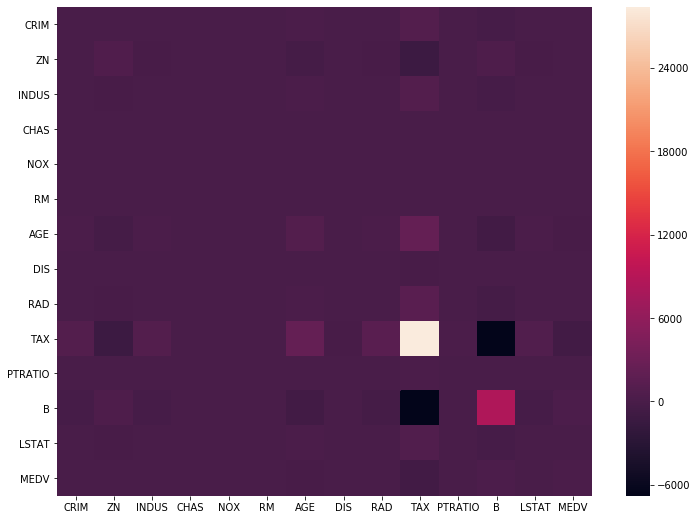

In [12]:
plt.subplots(figsize=(12,9))
covariance_matrix = df.cov().round(20)
sns.heatmap(data=covariance_matrix, annot=False)

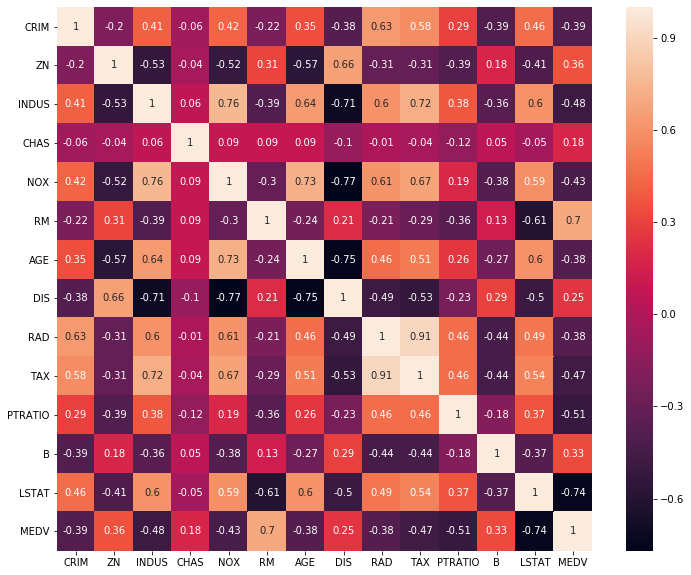

In [13]:
plt.subplots(figsize=(12,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

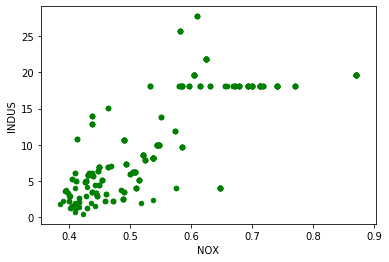

In [14]:
df.plot(kind='scatter',x='NOX',y='INDUS', color="green")
plt.show()

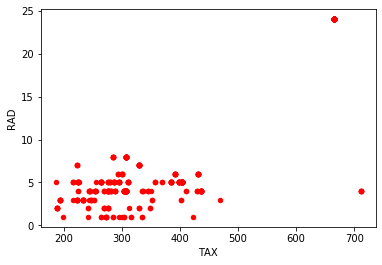

In [15]:
df.plot(kind='scatter',x='TAX',y='RAD', color="red")
plt.show()

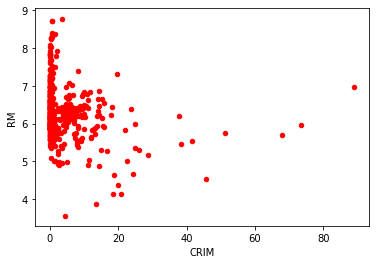

In [16]:
df.plot(kind='scatter',x='CRIM',y='RM',color='red')
plt.show()

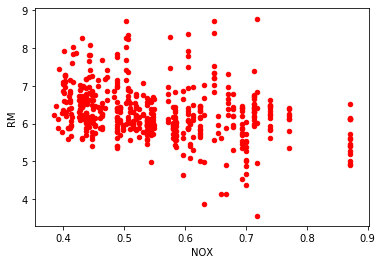

In [17]:
df.plot(kind='scatter',x='NOX',y='RM',color='red')
plt.show()

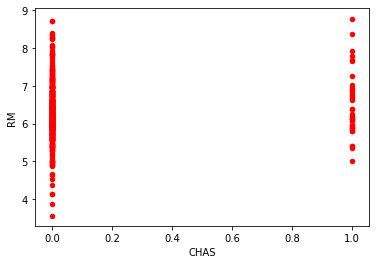

In [18]:
df.plot(kind='scatter',x='CHAS',y='RM',color='red')
plt.show()

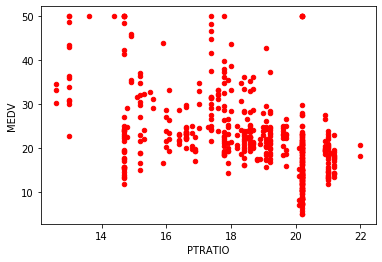

In [19]:
df.plot(kind='scatter',x='PTRATIO',y='MEDV',color='red')
plt.show()

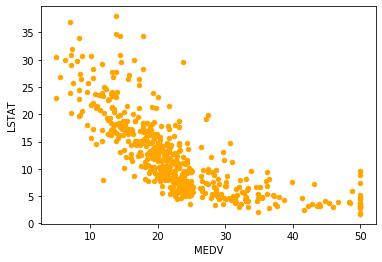

In [20]:
df.plot(kind='scatter',x='MEDV',y='LSTAT',color='orange')
plt.show()

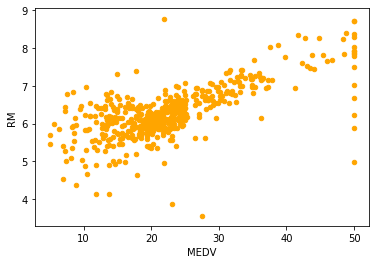

In [21]:
df.plot(kind='scatter',x='MEDV',y='RM',color='orange')
plt.show()

In [22]:
np.polyfit(df['MEDV'], df['PTRATIO'], 1)

array([-0.11953007, 21.14888155])

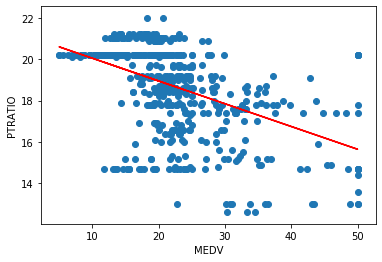

In [23]:
plt.plot(df['MEDV'], df['MEDV'] * -0.11 + 21.148, 'r-')
plt.scatter(df['MEDV'], df['PTRATIO'])
plt.xlabel('MEDV')
plt.ylabel('PTRATIO')
plt.show()

***
## Section 2 - Inferential

High level description of the ttests

For this experiment I want to see the ttest statistics and pvalues for each variable in the dataset run against the all of the others. From the initial analysis we can see there is no correlation between a lot of the variable but I still think it will be interesting to see this plotted

In [95]:
df_results = pd.DataFrame(columns=['Var1', 'Var2','ttest Statistic','ttest Pvalue'])
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue


In [96]:
#defining empty lists that will store the results of the ttest loop
v1 = []
v2 = []
S = []
P = []

In [97]:
for column in df:
    for column1 in df:
        result = ss.ttest_ind(df[column], df[column1])
        #print(column, column1, result.statistic, result.pvalue)
        v1.append(column)
        v2.append(column1)
        S.append(result.statistic)
        P.append(result.pvalue)

In [98]:
df_results['Var1'] = v1
df_results['Var2'] = v2
df_results['ttest Statistic'] = S
df_results['ttest Pvalue'] = P
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue
0,CRIM,CRIM,0.000000,1.000000e+00
1,CRIM,ZN,-7.013196,4.259687e-12
2,CRIM,INDUS,-15.381434,3.988806e-48
3,CRIM,CHAS,9.265024,1.141922e-19
4,CRIM,NOX,7.998610,3.430040e-15
5,CRIM,RM,-6.962202,6.024193e-12
6,CRIM,AGE,-49.646090,3.097115e-273
7,CRIM,DIS,-0.461087,6.448357e-01
8,CRIM,RAD,-10.909390,2.842063e-26
9,CRIM,TAX,-53.934427,1.251318e-299


In [99]:
# Removing the rows where the ttest was conducted on the same set of values eg ss.ttest_ind(CRIM, CRIM)
df_results = df_results.drop([0,15,30,45,60,75,90,105,120,135,150,165,180,195], axis=0)

In [100]:
df_results.describe()

,ttest Statistic,ttest Pvalue
count,1.820000e+02,1.820000e+02
mean,-2.303408e-15,1.996319e-02
std,6.093260e+01,1.122397e-01
min,-1.897386e+02,0.000000e+00
25%,-3.886667e+01,1.777574e-300
50%,0.000000e+00,1.639099e-204
75%,3.886667e+01,2.995205e-48
max,1.897386e+02,8.337797e-01


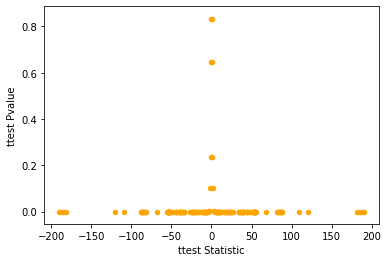

In [101]:
df_results.plot(kind='scatter',x='ttest Statistic',y='ttest Pvalue',color='orange')
plt.show()

Looking at this scatter plot, it looks like there are only 2 pairs of variables that might be significant. First we'll sort the data to find the tests where the P value is greater than 0.5%.

In [102]:
df_results.sort_values(by='ttest Pvalue', ascending=False)

,Var1,Var2,ttest Statistic,ttest Pvalue
29,INDUS,ZN,-0.209911,8.337797e-01
16,ZN,INDUS,0.209911,8.337797e-01
98,DIS,CRIM,0.461087,6.448357e-01
7,CRIM,DIS,-0.461087,6.448357e-01
169,LSTAT,ZN,1.189155,2.346582e-01
26,ZN,LSTAT,-1.189155,2.346582e-01
113,RAD,ZN,-1.639298,1.014625e-01
22,ZN,RAD,1.639298,1.014625e-01
36,INDUS,RAD,3.221156,1.317525e-03
114,RAD,INDUS,-3.221156,1.317525e-03


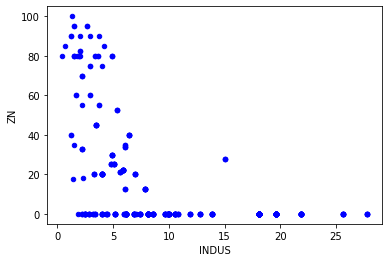

In [92]:
df.plot(kind='scatter',x='INDUS',y='ZN',color='blue')
plt.show()

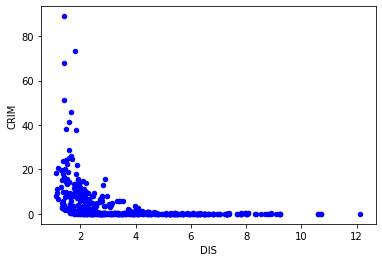

In [91]:
df.plot(kind='scatter',x='DIS',y='CRIM',color='blue')
plt.show()

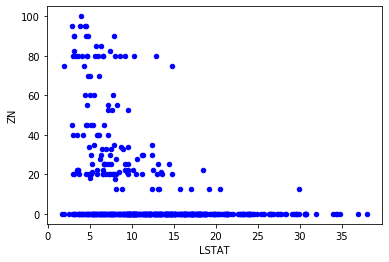

In [93]:
df.plot(kind='scatter',x='LSTAT',y='ZN',color='blue')
plt.show()

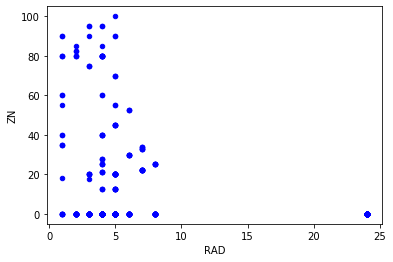

In [94]:
df.plot(kind='scatter',x='RAD',y='ZN',color='blue')
plt.show()

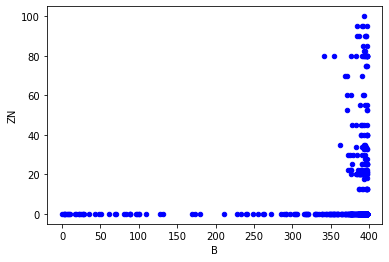

In [103]:
df.plot(kind='scatter',x='B',y='ZN',color='blue')
plt.show()